In [7]:
import pandas as pd
df = pd.read_csv("01.csv", sep=";", low_memory=False, encoding='UTF-8')
df = df[["brand", "name", "lon", "lat"]]

# Wir wollen nur die Objektklasse TLM_SIEDLUNGSNAME:
df.head()

,brand,name,lon,lat
0,Ruedi Rüssel,Ruedi Rüssel,7.640907,47.530029
1,Migrol,Migrol Service Muttenz,7.655820,47.526872
2,Ruedi Rüssel,Ruedi Rüssel Muttenz,7.645794,47.528606
3,Coop,Coop Tankstelle,7.683966,47.525033


In [8]:
df.to_json()

'{"brand":{"0":"Ruedi R\\u00fcssel","1":"Migrol","2":"Ruedi R\\u00fcssel","3":"Coop"},"name":{"0":"Ruedi R\\u00fcssel","1":"Migrol Service Muttenz","2":"Ruedi R\\u00fcssel Muttenz","3":"Coop Tankstelle"},"lon":{"0":7.6409066,"1":7.65582,"2":7.6457936,"3":7.6839663},"lat":{"0":47.5300292,"1":47.5268723,"2":47.5286057,"3":47.5250327}}'

In [5]:
from pymongo import MongoClient
from getpass import getuser

dbname = "GP2-" + getuser().replace(" ","").lower()
client = MongoClient("db.geopython.xyz",
                     username="igeo",
                     password="m0nG0&dB!")
db = client[dbname]
collection = db.P01

In [6]:
collection.insert_many(df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
dbname = "GP2-" + getuser().replace(" ","").lower()
client = MongoClient("db.geopython.xyz",
                     username="igeo",
                     password="m0nG0&dB!")
db = client[dbname]
collection = db.P01

In [9]:
import csv
from pymongo import MongoClient

dbname = "GP2-" + getuser().replace(" ","").lower()
client = MongoClient("db.geopython.xyz",
                     username="igeo",
                     password="m0nG0&dB!")
db = client[dbname]
collection = db.P01

# CSV-Datei öffnen
with open('01.csv', 'r') as file:
    csv_data = csv.reader(file, delimiter=';')
    header = next(csv_data)  # Spaltennamen auslesen

    # Daten aus der CSV-Datei in MongoDB einfügen
    for row in csv_data:
        data = {
            'brand': row[0],
            'name': row[1],
            'geometry': {
                'lon': float(row[2]),
                'lat': float(row[3])}
        }
        collection.insert_one(data)



In [12]:
# Abfrage für Tankstellen in der Schweiz
query = {
    "geometry": {
        "$geoWithin": {
            "$geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [5.9559, 45.8171],  # Koordinaten für die Begrenzung der Schweiz
                        [10.4921, 45.8171],
                        [10.4921, 47.8084],
                        [5.9559, 47.8084],
                        [5.9559, 45.8171]
                    ]
                ]
            }
        }
    }
}

# Abfrage durchführen
result = collection.find(query)

# Ergebnisse anzeigen
for item in result:
    print(item)


{'_id': ObjectId('6470541b8d32a71c85c3a393'), 'brand': 'Ruedi Rüssel', 'name': 'Ruedi Rüssel', 'geometry': {'lon': 7.6409066, 'lat': 47.5300292}}
{'_id': ObjectId('6470541c8d32a71c85c3a394'), 'brand': 'Migrol', 'name': 'Migrol Service Muttenz', 'geometry': {'lon': 7.65582, 'lat': 47.5268723}}
{'_id': ObjectId('6470541c8d32a71c85c3a395'), 'brand': 'Ruedi Rüssel', 'name': 'Ruedi Rüssel Muttenz', 'geometry': {'lon': 7.6457936, 'lat': 47.5286057}}
{'_id': ObjectId('6470541c8d32a71c85c3a396'), 'brand': 'Coop', 'name': 'Coop Tankstelle', 'geometry': {'lon': 7.6839663, 'lat': 47.5250327}}


In [19]:

collection.create_index([("geometry", '2dsphere')])

'geometry_2dsphere'

In [20]:

lon = 7.1234
lat = 47.5678
query = {
    "geometry": {
        "$nearSphere": {
            "$geometry": {
                "type": "Point",
                "coordinates": [lon, lat]  # Aktuelle Position
            },
            "$maxDistance": 100*1000  # hier werden Tankstellen im Umkreis von 100km abgefragt
        }
    }
}
 

# Abfrage durchführen
result = collection.find(query)

# Ergebnisse anzeigen
for doc in result:
    print(doc)

{'_id': ObjectId('6470541b8d32a71c85c3a393'), 'brand': 'Ruedi Rüssel', 'name': 'Ruedi Rüssel', 'geometry': {'lon': 7.6409066, 'lat': 47.5300292}}
{'_id': ObjectId('6470541c8d32a71c85c3a395'), 'brand': 'Ruedi Rüssel', 'name': 'Ruedi Rüssel Muttenz', 'geometry': {'lon': 7.6457936, 'lat': 47.5286057}}
{'_id': ObjectId('6470541c8d32a71c85c3a394'), 'brand': 'Migrol', 'name': 'Migrol Service Muttenz', 'geometry': {'lon': 7.65582, 'lat': 47.5268723}}
{'_id': ObjectId('6470541c8d32a71c85c3a396'), 'brand': 'Coop', 'name': 'Coop Tankstelle', 'geometry': {'lon': 7.6839663, 'lat': 47.5250327}}


In [24]:
import geopandas as gpd

csv_file = "01.csv"

df = gpd.read_file(csv_file, delimiter=";") #geopandas

# a) Anzahl der Tankstellen der Firma "Tamoil"
tamoil_count = len(df[df['brand'] == 'Tamoil'])
print("Anzahl der Tankstellen von Tamoil:", tamoil_count)

# b) Shapefile erstellen
output_shapefile = "tankstellen.shp"
df.to_file(output_shapefile)



Anzahl der Tankstellen von Tamoil: 0


In [25]:
import folium

# Daten der Berggipfel
data = [
    [45.922513343092916, 7.835574679184418, 'Liskamm', 4527],
    [45.941997570720375, 7.869820276613906, 'Nordend', 4609],
    [46.10902325837147, 7.863895545667632, 'Nadelhorn', 4327],
    [45.932186337151684, 7.8714190183674555, 'Zumsteinspitze', 4563],
    [46.08336532442726, 7.857296913890337, 'Täschhorn', 4491],
    [45.91669904679932, 7.863563975062021, 'Ludwigshöhe', 4341],
    [45.93756139078208, 7.299279971077615, 'Grand Combin de Grafeneire', 4314],
    [45.922513343092916, 7.835574679184418, 'Lyskamm', 4527],
    [45.93683662540408, 7.866814344981748, 'Dufourspitze (Pointe Dufour)', 4634],
    [46.10129664518156, 7.716156885858494, 'Weisshorn', 4506],
    [45.976340506120614, 7.658691510512221, 'Monte Cervino', 4478],
    [45.976340506120614, 7.658691510512221, 'Matterhorn', 4478],
    [45.93674004101607, 7.86855410887458, 'Grenzgipfel', 4618],
    [45.92712756883081, 7.876921984235257, 'Signalkuppe (Punta Gnifetti)', 4554],
    [46.093839189553464, 7.858928716434883, 'Dom', 4545],
    [46.107109586833495, 7.711724522200983, 'Grand Gendarme', 4331],
    [45.919638502715564, 7.8711910872756405, 'Parrotspitze', 4432],
    [46.093839189553464, 7.858928716434883, 'Mischabel', 4545],
    [46.03426257063022, 7.61204033560156, 'Dent Blanche', 4357]
]

# Zentrale Koordinaten für die Kartenansicht
center_lat, center_lon = 46.0833, 7.7

# Karte erstellen
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Marker für Gipfel über 4300 m hinzufügen
for lat, lon, name, elevation in data:
    if elevation > 4300:
        folium.Marker(
            location=[lat, lon],
            popup=name,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

# Karte als HTML-Datei speichern
output_file = "peaks.html"
m.save(output_file)

# Erfolgsmeldung
print("Die Karte wurde als", output_file, "gespeichert.")


Die Karte wurde als peaks.html gespeichert.


In [27]:
from shapely.geometry import Polygon, Point

def check_polygon_intersection(polygon_a, polygon_b):
    # Überprüfen, ob sich die Polygone schneiden
    intersection = polygon_a.intersection(polygon_b)
    return not intersection.is_empty

def calculate_polygon_union(polygon_a, polygon_b):
    # Berechnen der Vereinigung von A und B
    union = polygon_a.union(polygon_b)
    return union

def check_point_in_polygons(point, polygons):
    # Überprüfen, ob der Punkt innerhalb der Polygone liegt
    results = {}
    for name, polygon in polygons.items():
        if polygon.contains(point):
            results[name] = True
        else:
            results[name] = False
    return results

# Beispiel Polygone
polygon_a_coords = [(1, 1), (4, 1), (4, 4), (1, 4)]
polygon_b_coords = [(3, 3), (6, 3), (6, 6), (3, 6)]

# Erstellen der Polygone
from shapely.geometry import Polygon
polygon_a = Polygon(polygon_a_coords)
polygon_b = Polygon(polygon_b_coords)

# a) Testen, ob sich die Polygone schneiden
intersection_check = check_polygon_intersection(polygon_a, polygon_b)
print("Schneiden sich die Polygone? ", intersection_check)

# b) Berechnen der Vereinigung von A und B
polygon_c = calculate_polygon_union(polygon_a, polygon_b)
print("Polygon C (Vereinigung von A und B): ", polygon_c)

# c) Testen, ob der Punkt (3, 3) innerhalb von A, B und C liegt
point = Point(3, 3)
polygons = {
    "A": polygon_a,
    "B": polygon_b,
    "C": polygon_c
}
point_check = check_point_in_polygons(point, polygons)
print("Liegt der Punkt (3, 3) innerhalb der Polygone?")
for name, result in point_check.items():
    print(name, ": ", result)



Schneiden sich die Polygone?  True
Polygon C (Vereinigung von A und B):  POLYGON ((4 3, 4 1, 1 1, 1 4, 3 4, 3 6, 6 6, 6 3, 4 3))
Liegt der Punkt (3, 3) innerhalb der Polygone?
A :  True
B :  False
C :  True


In [28]:
print(intersection_check)

True


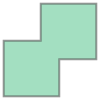

In [29]:

polygon_c = calculate_polygon_union(polygon_a, polygon_b)
polygon_c

In [30]:
point = Point(3, 3)
polygons = {
    "A": polygon_a,
    "B": polygon_b,
    "C": polygon_c
}
point_check = check_point_in_polygons(point, polygons)
for name, result in point_check.items():
    print(name, ": ", result)

A :  True
B :  False
C :  True


In [31]:
import geopandas as gpd

csv_file = "01.csv"

# Daten einlesen
df = gpd.read_file(csv_file, delimiter=";")

# a) Anzahl der Tankstellen der Firma "Tamoil"
tamoil_count = len(df[df['brand'] == 'Tamoil'])
print("Anzahl der Tankstellen von Tamoil:", tamoil_count)

# b) Shapefile erstellen
output_shapefile = "tankstellen.shp"
df.to_file(output_shapefile, driver='ESRI Shapefile')

# Überprüfen des CRS (Coordinate Reference System)
print("CRS:", df.crs)

# Ausgabe der ersten Zeilen des Shapefiles
print(df.head())


Anzahl der Tankstellen von Tamoil: 0
CRS: None
          brand                    name        lon         lat geometry
0  Ruedi Rüssel            Ruedi Rüssel  7.6409066  47.5300292     None
1        Migrol  Migrol Service Muttenz  7.6558200  47.5268723     None
2  Ruedi Rüssel    Ruedi Rüssel Muttenz  7.6457936  47.5286057     None
3          Coop         Coop Tankstelle  7.6839663  47.5250327     None


In [34]:
import geopandas as gpd
from shapely.geometry import Point

csv_file = "01.csv"

# Daten einlesen
df = gpd.read_file(csv_file, delimiter=";")

# Geometriespalte erstellen
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = 'EPSG:4326'  # Koordinatensystem (WGS84)

# DataFrame aktualisieren
df = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# a) Anzahl der Tankstellen der Firma "Tamoil"
tamoil_count = len(df[df['brand'] == 'Tamoil'])
print("Anzahl der Tankstellen von Tamoil:", tamoil_count)

# b) Shapefile erstellen
output_shapefile = "tankstellen.shp"
df.to_file(output_shapefile)

# Überprüfen des CRS (Coordinate Reference System)
print("CRS:", df.crs)

# Ausgabe der ersten Zeilen des Shapefiles
print(df.head())


TypeError: must be real number, not str

In [36]:
import geopandas as gpd
from shapely.geometry import Point

csv_file = "01.csv"

df = gpd.read_file(csv_file, delimiter=";")

# Geometriespalte erstellen, Die Koordinaten müssen von String nach Float umgerechnet werden
df['lon'] = df['lon'].astype(float) 
df['lat'] = df['lat'].astype(float) 
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = 'EPSG:4326'  

df = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# a) Anzahl der Tankstellen der Firma "Tamoil"
tamoil_count = len(df[df['brand'] == 'Tamoil'])
print("Anzahl der Tankstellen von Tamoil:", tamoil_count)

# b) Shapefile erstellen
output_shapefile = "tankstellen.shp"
df.to_file(output_shapefile)



Anzahl der Tankstellen von Tamoil: 0
